## CTS1 growth rate effect

In [1]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
import numpy as np
from scipy.stats import norm
from scipy import stats
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from statistics import multimode
from scipy.stats import erlang
warnings.filterwarnings('ignore')

import os

In [2]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/beta-cts1_1/Results/rep1_results/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/beta-cts1_1/Results/rep1_results


In [3]:
files=sorted(os.listdir())
counts=[]
count_data_1=pd.DataFrame()

for f in files:
    if('be' in f):
        df=pd.read_csv(f)['counts']
        df.name=f[0:f.index('.csv')]
        count_data_1=pd.concat([count_data_1,df],axis=1)



In [4]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/beta-cts1_1/Results/rep2_results/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/beta-cts1_1/Results/rep2_results


In [5]:
files=sorted(os.listdir())
counts=[]
count_data_2=pd.DataFrame()

for f in files:
    if('be' in f):
        df=pd.read_csv(f)['counts']
        df.name=f[0:f.index('.csv')]
        count_data_2=pd.concat([count_data_2,df],axis=1)


In [6]:
mean_1=np.array(count_data_1.mean()).reshape(3,3).round(1)
mean_2=np.array(count_data_2.mean()).reshape(3,3).round(1)

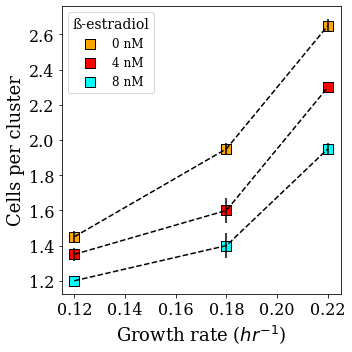

In [16]:
plt.rc('font',family='serif')

plt.figure(figsize=(5,5))
growth_rates=[0.12,0.18,0.22]

mean_d2=np.mean([mean_1[:,0],mean_2[:,0]],axis=0)
std_d2=np.std([mean_1[:,0],mean_2[:,0]],axis=0)/np.sqrt(2)
plt.scatter(growth_rates,mean_d2,marker='s',s=100,color='orange',edgecolors='black')
plt.errorbar(growth_rates,mean_d2,std_d2,color='black',linestyle='--')

mean_d005=np.mean([mean_1[:,1],mean_2[:,1]],axis=0)
std_d005=np.std([mean_1[:,1],mean_2[:,1]],axis=0)/np.sqrt(2)
plt.scatter(growth_rates,mean_d005,marker='s',s=100,color='red',edgecolors='black')
plt.errorbar(growth_rates,mean_d005,std_d005,color='black',linestyle='--')

mean_d0025=np.mean([mean_1[:,2],mean_2[:,2]],axis=0)
std_d0025=np.std([mean_1[:,2],mean_2[:,2]],axis=0)/np.sqrt(2)
plt.scatter(growth_rates,mean_d0025,marker='s',s=100,color='cyan',edgecolors='black')
plt.errorbar(growth_rates,mean_d0025,std_d0025,color='black',linestyle='--')

plt.xlabel('Growth rate ($hr^{-1}$)',fontsize=18)
plt.ylabel('Cells per cluster',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['0 nM','4 nM','8 nM'],fontsize=12,title='ß-estradiol').get_title().set_fontsize(14)
plt.tight_layout()
# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/cts1_breaking_rate_growth_rate.jpg',dpi=600)


### As in model

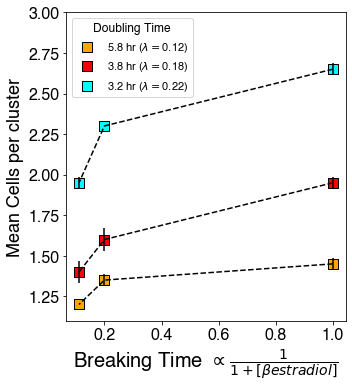

In [9]:
plt.rc('font',family='helvetica')

plt.figure(figsize=(5,5.5))
bt=1/(1+np.array([0,4,8]))
dt=np.round(0.693/np.array([0.12,0.18,0.22]),1)

dt_list=[str(d)+' hr '+'('+r'$\lambda = $'+str(np.round(0.693/d,2))+')' for d in dt]

mean_d2=np.mean([mean_1[0,:],mean_2[0,:]],axis=0)
std_d2=np.std([mean_1[0,:],mean_2[0,:]],axis=0)/np.sqrt(2)
plt.scatter(bt,mean_d2,marker='s',s=100,color='orange',edgecolors='black')
plt.errorbar(bt,mean_d2,std_d2,color='black',linestyle='--')

mean_d005=np.mean([mean_1[1,:],mean_2[1,:]],axis=0)
std_d005=np.std([mean_1[1,:],mean_2[1,:]],axis=0)/np.sqrt(2)
plt.scatter(bt,mean_d005,marker='s',s=100,color='red',edgecolors='black')
plt.errorbar(bt,mean_d005,std_d005,color='black',linestyle='--')

mean_d0025=np.mean([mean_1[2,:],mean_2[2,:]],axis=0)
std_d0025=np.std([mean_1[2,:],mean_2[2,:]],axis=0)/np.sqrt(2)
plt.scatter(bt,mean_d0025,marker='s',s=100,color='cyan',edgecolors='black')
plt.errorbar(bt,mean_d0025,std_d0025,color='black',linestyle='--')

plt.xlabel(r'Breaking Time $\propto \frac{1}{1+[\beta estradiol]}$',fontsize=20)
plt.ylabel('Mean Cells per cluster',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(dt_list,fontsize=11,title='Doubling Time').get_title().set_fontsize(12)
plt.ylim(1.1,3)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/cts1_breaking_rate_doub_time.jpg',dpi=600)



## BUD4 growth rate effect

In [98]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/BUD4_Growth/Final/


/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/BUD4_Growth/Final


In [99]:
files

['.DS_Store',
 'BUD1_D0025.csv',
 'BUD1_D005.csv',
 'BUD1_D02.csv',
 'BUD1_D2.csv',
 'BUD2_D0025.csv',
 'BUD2_D005.csv',
 'BUD2_D02.csv',
 'BUD2_D2.csv']

In [100]:
files=sorted(os.listdir())
counts=[]
count_data1=pd.DataFrame()

for f in files:
    if('BUD1' in f):
        df=pd.read_csv(f)['cell_counts']
        count_data1[f[5:f.index('.csv')]]=df

files=sorted(os.listdir())
counts=[]
count_data2=pd.DataFrame()

for f in files:
    if('BUD2' in f):
        df=pd.read_csv(f)['cell_counts']
        count_data2[f[5:f.index('.csv')]]=df






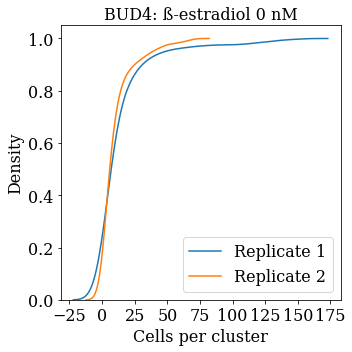

In [124]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.kdeplot(count_data1['D005'],cumulative=True)
sns.kdeplot(count_data2['D005'],cumulative=True)
plt.xlabel('Cells per cluster',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Replicate 1','Replicate 2'],fontsize=16)
plt.title('BUD4: ß-estradiol 0 nM',fontsize=16)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Replicate_Const_BUD4_OFF_D005.jpg',dpi=600)

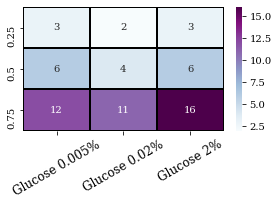

In [102]:
data=count_data2.quantile(q=[0.25,0.5,0.75])

plt.rc('font',family='serif')
plt.figure(figsize=(4,3))
sns.heatmap(data=data,cmap='BuPu',linewidths=1,linecolor='black',annot=True)
plt.xticks([0.5,1.5,2.5],labels=['Glucose 0.005%','Glucose 0.02%','Glucose 2%'],fontsize=12,rotation=30)
# plt.yticks([0.5,1.5,2.5],labels=['Q1','Q2','Q3'],fontsize=12,rotation=30)
plt.tight_layout()

# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/BUD4_Counts_Percentiles.jpg',dpi=600)

In [20]:
m1=count_data1.mean()
m2=count_data2.mean()
m3=count_data3.mean()
mean=np.mean([m1,m2,m3],axis=0)

In [22]:
s1=count_data1.std()
s2=count_data2.std()
s3=count_data3.std()
std=np.std([s1,s2,s3],axis=0)

In [111]:
count_data=pd.concat([count_data1,count_data2],axis=0)

In [125]:
count_data1.describe()

,D0025,D005,D2
count,205.00000,205.000000,205.000000
mean,12.57561,12.331707,17.692683
std,15.49068,22.261530,29.048442
min,1.00000,1.000000,1.000000
25%,3.00000,2.000000,2.000000
50%,5.00000,5.000000,5.000000
75%,18.00000,13.000000,18.000000
max,83.00000,150.000000,145.000000


In [126]:
count_data2.describe()

,D0025,D005,D2
count,195.000000,195.000000,195.000000
mean,10.205128,9.353846,16.784615
std,12.761450,12.567874,27.617878
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000
50%,6.000000,4.000000,6.000000
75%,12.000000,11.000000,16.000000
max,77.000000,69.000000,166.000000


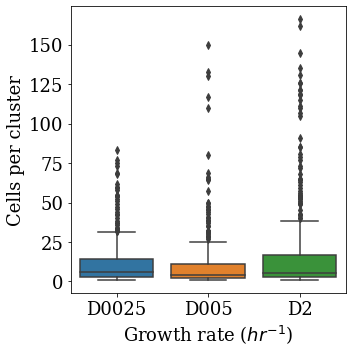

In [128]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.boxplot(data=count_data)
plt.xlabel(r'Growth rate ($hr^{-1}$)',fontsize=18)
plt.ylabel(r'Cells per cluster',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()




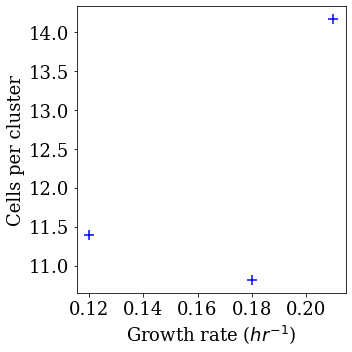

In [113]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
plt.scatter([0.12,0.18,0.21],mean,marker="+",s=100,color='blue')
plt.xlabel(r'Growth rate ($hr^{-1}$)',fontsize=18)
plt.ylabel(r'Cells per cluster',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()



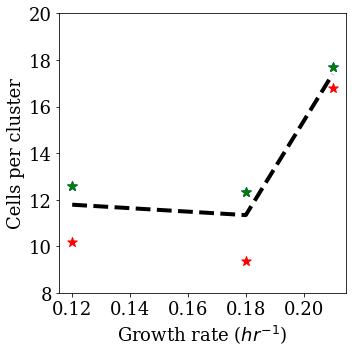

In [24]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
plt.scatter([0.12,0.18,0.21],m1,marker="*",s=100,color='blue')
plt.scatter([0.12,0.18,0.21],m2,marker="*",s=100,color='red')
plt.scatter([0.12,0.18,0.21],m3,marker="*",s=100,color='green')
plt.plot([0.12,0.18,0.21],mean,"--",color='black',linewidth=4)
# plt.fill_between([0.12,0.18,0.21],mean-(std/np.sqrt(3)),mean+(std/np.sqrt(3)),alpha=0.5,color='lightblue')
plt.xlabel(r'Growth rate ($hr^{-1}$)',fontsize=18)
plt.ylabel(r'Cells per cluster',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([8,20])
plt.tight_layout()

# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Size_growth_rate_validation.jpg',dpi=600)


In [129]:
stats.ks_2samp(count_data2['D2'],count_data2['D0025'],alternative='lesser')

KstestResult(statistic=0.11282051282051282, pvalue=0.08366373564849611)

## BUD4 Analysis

In [36]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/BUD4_Growth/Final_run/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/BUD4_Growth/Final_run


In [37]:
ls

BUD1_D0025.csv* BUD1_D02.csv*   BUD2_D0025.csv* BUD2_D02.csv*
BUD1_D005.csv*  BUD1_D2.csv*    BUD2_D005.csv*  BUD2_D2.csv*


In [53]:
files=sorted(os.listdir())
counts=[]
count_data=pd.DataFrame()

for f in files:
    if('BUD' in f and 'growth' not in f):
        df=pd.read_csv(f)['cell_counts']
        df.name=f[3:f.index('.csv')]
        count_data=pd.concat([count_data,df],axis=1)


In [54]:
count_data.describe()

,1_D0025,1_D005,1_D02,1_D2,2_D0025,2_D005,2_D02,2_D2
count,205.00000,265.000000,458.000000,259.000000,195.000000,332.000000,495.000000,443.000000
mean,12.57561,11.705660,14.150655,17.054054,10.205128,9.927711,13.767677,11.665914
std,15.49068,20.318584,20.802952,26.641551,12.761450,13.462072,19.432864,18.629791
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.00000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000
50%,5.00000,5.000000,5.000000,6.000000,6.000000,4.000000,4.000000,4.000000
75%,18.00000,12.000000,17.000000,19.000000,12.000000,11.000000,19.000000,11.000000
max,83.00000,150.000000,169.000000,145.000000,77.000000,77.000000,116.000000,111.000000


In [68]:
m1=np.mean(count_data.loc[:,'1_D0025':'1_D2'])
m2=np.mean(count_data.loc[:,'2_D0025':'2_D2'])


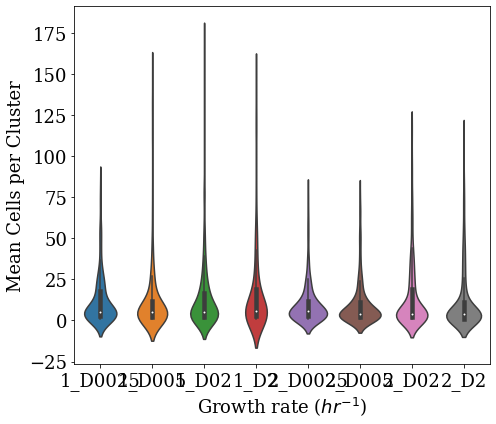

In [97]:
plt.rc('font',family='serif')
plt.figure(figsize=(7,6))
sns.violinplot(data=count_data)
# plt.fill_between([0.12,0.18,0.21],mean-std,mean+std,alpha=0.4,color='lightblue')
plt.xlabel(r'Growth rate ($hr^{-1}$)',fontsize=18)
plt.ylabel(r'Mean Cells per Cluster',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim([25,70])
# plt.colorbar().set_label('Glucose conc.',fontsize=18)
plt.tight_layout()
# plt.ylim([8,15])
# plt.xlim([0.09,0.22])
# stats.spearmanr([0.12,0.18,0.21],mean)
# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/ClusterSize_10.jpg',dpi=600)

In [90]:
d0025=count_data['1_D0025'].append(count_data['2_D0025']).dropna()
d005=count_data['1_D005'].append(count_data['2_D005']).dropna()
d02=count_data['1_D02'].append(count_data['2_D02']).dropna()
d2=count_data['1_D2'].append(count_data['2_D2']).dropna()

In [91]:
stats.mannwhitneyu(d005,d0025,alternative='greater')

MannwhitneyuResult(statistic=108691.0, pvalue=0.9920808837835966)

In [93]:
stats.mannwhitneyu(d02,d005,alternative='greater')

MannwhitneyuResult(statistic=301715.5, pvalue=0.021692622993330146)

In [94]:
stats.mannwhitneyu(d02,d2,alternative='greater')

MannwhitneyuResult(statistic=362989.5, pvalue=0.0014416805603902415)

In [95]:
stats.mannwhitneyu(d02,d0025,alternative='greater')

MannwhitneyuResult(statistic=186783.5, pvalue=0.7204721162848391)